# CatBoost

## Importing the libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


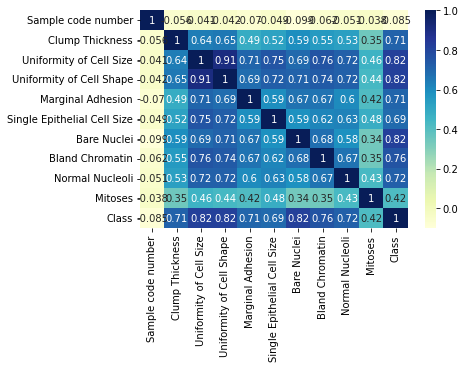

In [13]:
import seaborn as sns
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

In [11]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training CatBoost on the Training set

In [7]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.007956
0:	learn: 0.6778283	total: 48ms	remaining: 48s
1:	learn: 0.6642874	total: 49.2ms	remaining: 24.6s
2:	learn: 0.6510578	total: 50.4ms	remaining: 16.7s
3:	learn: 0.6351685	total: 51.4ms	remaining: 12.8s
4:	learn: 0.6203906	total: 52.6ms	remaining: 10.5s
5:	learn: 0.6053561	total: 53.5ms	remaining: 8.86s
6:	learn: 0.5913363	total: 54.2ms	remaining: 7.69s
7:	learn: 0.5773888	total: 55.2ms	remaining: 6.84s
8:	learn: 0.5638394	total: 56.3ms	remaining: 6.2s
9:	learn: 0.5507421	total: 57.4ms	remaining: 5.68s
10:	learn: 0.5377201	total: 58.5ms	remaining: 5.25s
11:	learn: 0.5243873	total: 59.5ms	remaining: 4.9s
12:	learn: 0.5129034	total: 60.5ms	remaining: 4.59s
13:	learn: 0.5047204	total: 61.9ms	remaining: 4.36s
14:	learn: 0.4942404	total: 62.9ms	remaining: 4.13s
15:	learn: 0.4836253	total: 65ms	remaining: 4s
16:	learn: 0.4733355	total: 66.1ms	remaining: 3.82s
17:	learn: 0.4629416	total: 67.7ms	remaining: 3.69s
18:	learn: 0.4527778	total: 69ms	remaining: 3.56s
19:	l

## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 0 50]]


0.9781021897810219

## Applying k-Fold Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6007221	total: 17.1ms	remaining: 2.43s
7:	learn: 0.5865261	total: 20.3ms	remaining: 2.52s
8:	learn: 0.5760173	total: 21.6ms	remaining: 2.38s
9:	learn: 0.5641784	total: 22.6ms	remaining: 2.24s
10:	learn: 0.5538549	total: 23.9ms	remaining: 2.14s
11:	learn: 0.5413434	total: 25ms	remaining: 2.06s
12:	learn: 0.5308262	total: 26.1ms	remaining: 1.98s
13:	learn: 0.5187893	total: 27.2ms	remaining: 1.92s
14:	learn: 0.5084890	total: 28.5ms	remaining: 1.87s
15:	learn: 0.4986254	total: 29.6ms	remaining: 1.82s
16:	learn: 0.4890714	total: 30.8ms	remaining: 1.78s
17:	learn: 0.4790883	total: 32ms	remaining: 1.74s
18:	learn: 0.4700108	total: 33ms	remaining: 1.71s
19:	learn: 0.4630325	total: 34.2ms	remaining: 1.67s
20:	learn: 0.4536134	total: 35.3ms	remaining: 1.65s
21:	learn: 0.4429695	total: 36.4ms	remaining: 1.62s
22:	learn: 0.4362340	total: 37.6ms	remaining: 1.59s
23:	learn: 0.4280061	total: 38.7ms	remaining: 1.57s
24:	learn: 0.4204806	to